In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv("datasets_185987_416528_diabetes2.csv")

In [3]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [9]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [10]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [1,2]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

Log loss on Test Data using Random Model 0.8811161492070427


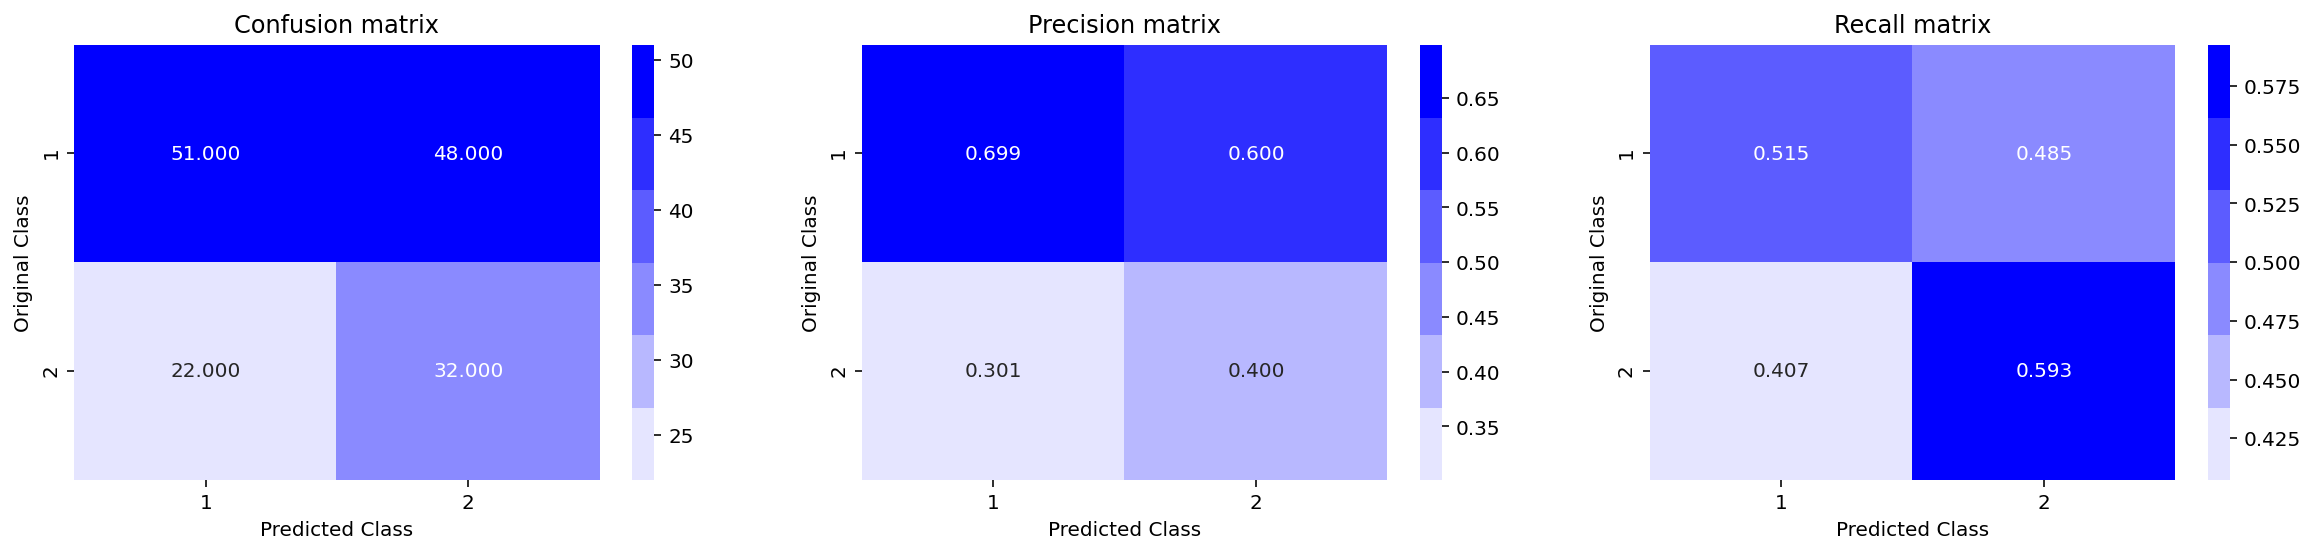

In [11]:
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [12]:
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]

In [13]:
clf = SGDClassifier(alpha=0.01, penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
y_pred2= clf.predict(X_test)

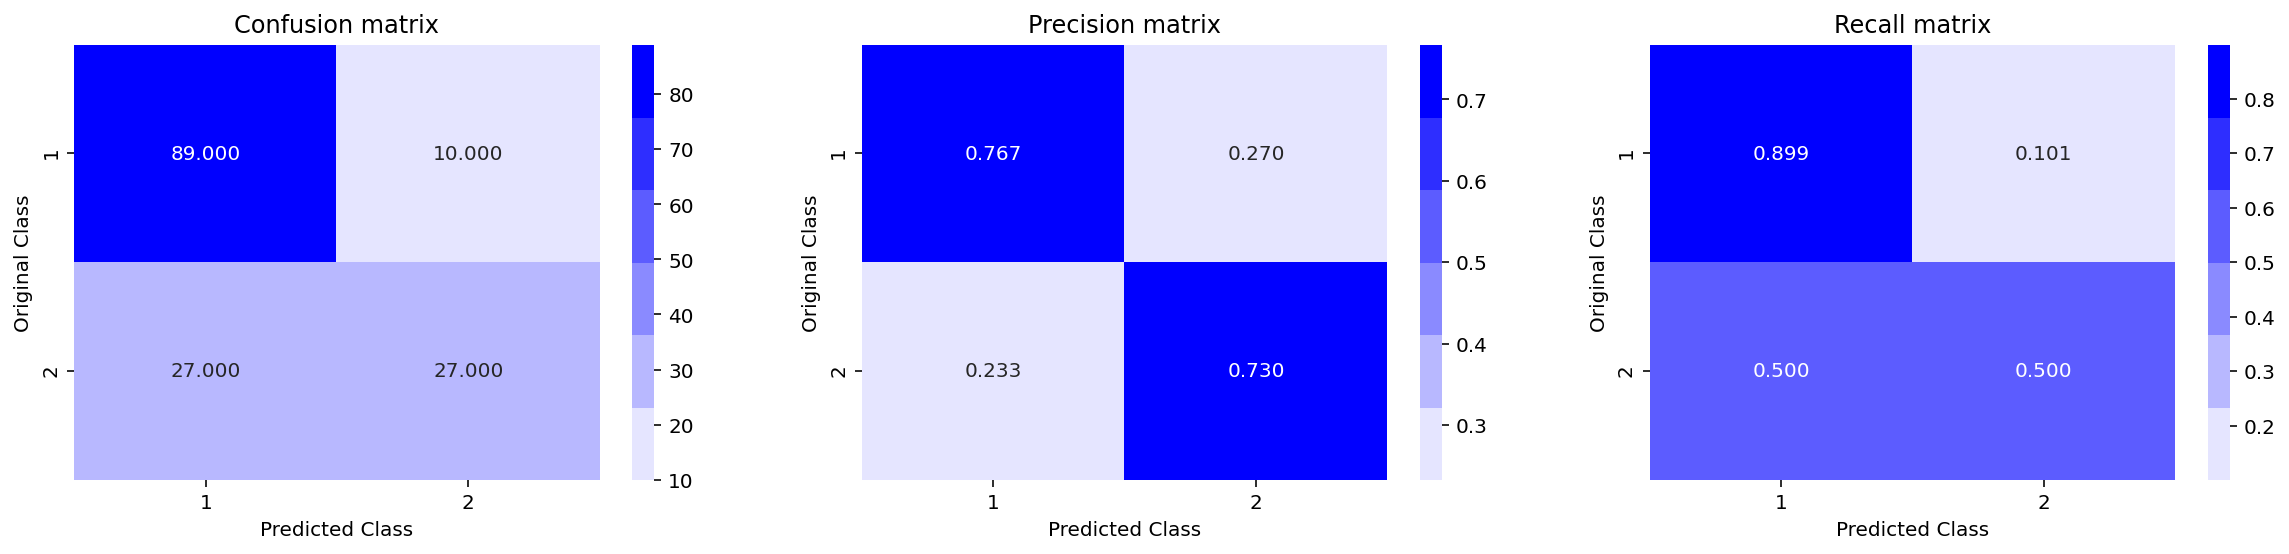

In [14]:
log_loss(y_test, y_pred2)
plot_confusion_matrix(y_test, y_pred2)

In [17]:
clf1 = make_pipeline(SGDClassifier(max_iter=1000, tol=1e-3))
clf1.fit(X_train, y_train)
y_pred= clf.predict(X_test)

In [18]:
for i in alpha:
    LR = LogisticRegression(C=i, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, yhat))

For values of alpha =  1e-06 The log loss is: 7.901110897913445
For values of alpha =  1e-05 The log loss is: 7.901110897913445
For values of alpha =  0.0001 The log loss is: 7.901110897913445
For values of alpha =  0.001 The log loss is: 8.126854534481488
For values of alpha =  0.01 The log loss is: 7.449597494142384
For values of alpha =  0.1 The log loss is: 7.901084767278471
For values of alpha =  1 The log loss is: 7.901079541151477
For values of alpha =  10 The log loss is: 8.12682317771952
For values of alpha =  100 The log loss is: 8.12682317771952
For values of alpha =  1000 The log loss is: 8.12682317771952


In [20]:
log_loss(y_test, yhat)

8.12682317771952

In [21]:
R = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
yhat = R.predict(X_test)
print('For values of alpha = ', 0.001, "The log loss is:",log_loss(y_test, yhat))

For values of alpha =  0.001 The log loss is: 8.126854534481488


In [0]:
# from sklearn.metrics import jaccard_similarity_score
# jaccard_similarity_score(y_test, yhat)

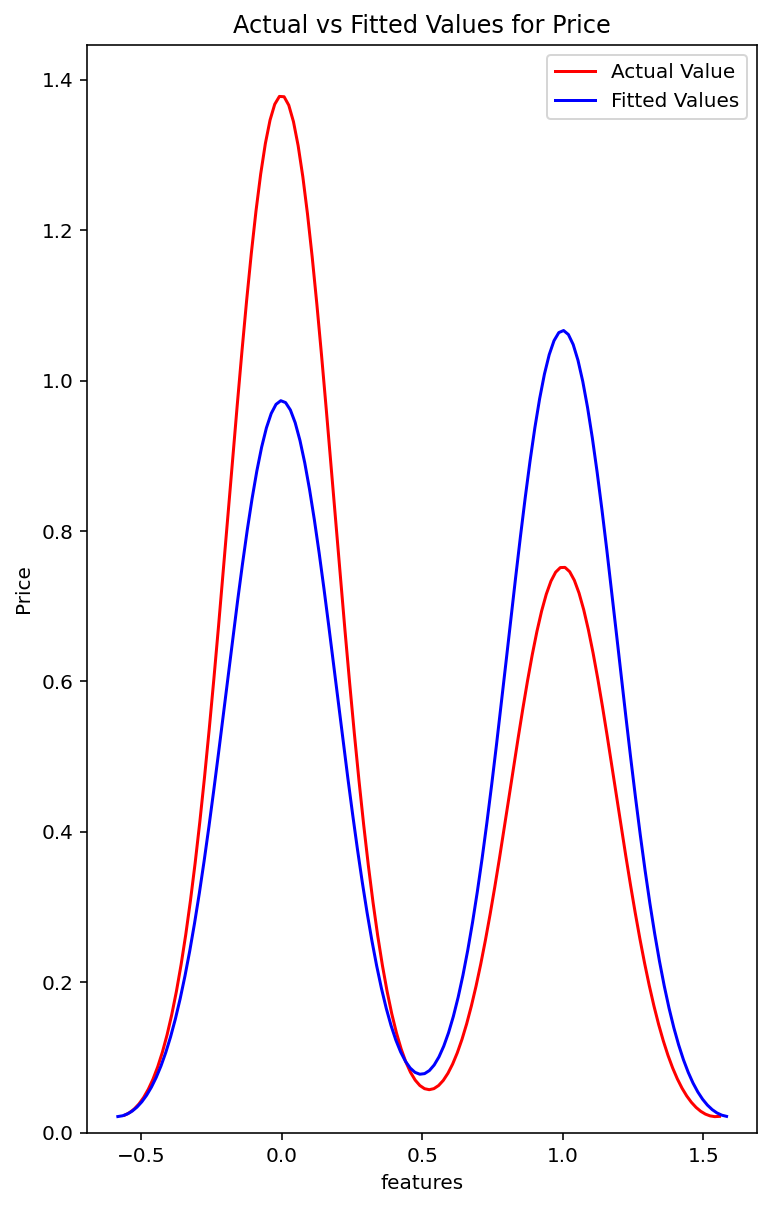

In [22]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted_y, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()

In [23]:
log_loss(y_test, predicted_y)

15.802305413858805

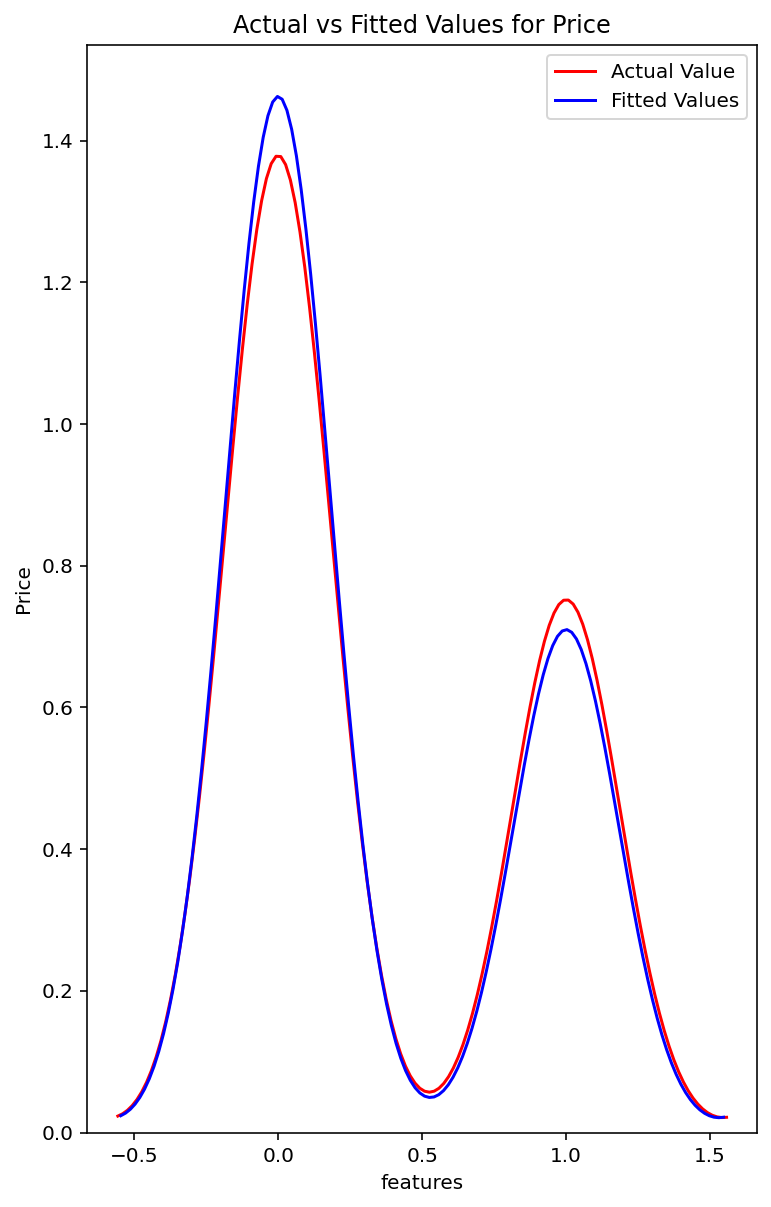

In [25]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()